# Analysis of Top Hits from Spotify
Spotify is a popular music streaming platform that allows users to listen to songs. In this EDA, I will explore Spotiy related dataset via visualisation and cleaning with help of python libraries like Matplotlib, Seaborn, Numpy and Pandas. 

#### Package Install and Import

First, we will install the necessary libraries for this project. 

In [40]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib

In [3]:
!pip install jovian opendatasets --upgrade --quiet

# Downloading the Dataset

In [5]:
dataset_url = 'https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019' 

In [27]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: tanveerd
Your Kaggle Key: ········


100%|██████████| 93.7k/93.7k [00:00<00:00, 42.7MB/s]

In [28]:
data_dir = './top-hits-spotify-from-20002019'

In [29]:
import os
os.listdir(data_dir)

['songs_normalize.csv']

In [30]:
project_name = "tanveeer-jovian-project-starter" 

In [32]:
!pip install jovian --upgrade -q

In [31]:
import jovian

In [24]:
jovian.commit(project="tanveer-jovian-project-starter")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "tanveer7d/tanveer-jovian-project-starter" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/tanveer7d/tanveer-jovian-project-starter


'https://jovian.ai/tanveer7d/tanveer-jovian-project-starter'

#### So far, in all the above cells, I have imported and downloaded the dataset that I have used for the analysis. The file is now ready to be used for further cleaning

# Data Preparation and Cleaning


In [43]:
spotify_df = pd.read_csv('songs_normalize.csv')

The below gives us the view of all columns and first 5 rows.

In [44]:
spotify_df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


The Below Cell shows us the type of data and number of null values we have. 

Here, we dont have any null values so we have a good ready to use dataset

In [45]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


In [46]:
#checking if any null values across the dataset
spotify_df.isna().any().any()


False

The below cell gives the statistical info of the dataset

In [33]:
spotify_df.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,228748.124500,2009.49400,59.872500,0.667437,0.720366,5.378000,-5.512435,0.553500,0.103568,0.128955,0.015226,0.181216,0.551690,120.122558
std,39136.569008,5.85996,21.335577,0.140416,0.152745,3.615059,1.933482,0.497254,0.096159,0.173346,0.087771,0.140669,0.220864,26.967112
min,113000.000000,1998.00000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203580.000000,2004.00000,56.000000,0.581000,0.622000,2.000000,-6.490250,0.000000,0.039600,0.014000,0.000000,0.088100,0.386750,98.985750
50%,223279.500000,2010.00000,65.500000,0.676000,0.736000,6.000000,-5.285000,1.000000,0.059850,0.055700,0.000000,0.124000,0.557500,120.021500
75%,248133.000000,2015.00000,73.000000,0.764000,0.839000,8.000000,-4.167750,1.000000,0.129000,0.176250,0.000068,0.241000,0.730000,134.265500
max,484146.000000,2020.00000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


Checking the number of rows and columns of the dataset

In [34]:
spotify_df.shape

(2000, 18)

Name of the Columns in the dataset

In [35]:
spotify_df.columns

Index(['artist', 'song', 'duration_ms', 'explicit', 'year', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'genre'],
      dtype='object')

#### The duration of songs in the dataset is in microseconds which isnt very helpful. We are used to seeing the duration of songs in minutes.

So, adding another column for duration_in_min and dropping the old microsecond column since it is of no use going forward.

In [36]:
spotify_df.duration_ms

0       211160
1       167066
2       250546
3       224493
4       200560
         ...  
1995    181026
1996    178426
1997    200593
1998    171029
1999    215280
Name: duration_ms, Length: 2000, dtype: int64

In [47]:
spotify_df['duration_in_min'] = spotify_df.duration_ms/ (1000*60)

In [48]:
spotify_df['duration_in_min'].round(2)

0       3.52
1       2.78
2       4.18
3       3.74
4       3.34
        ... 
1995    3.02
1996    2.97
1997    3.34
1998    2.85
1999    3.59
Name: duration_in_min, Length: 2000, dtype: float64

In [49]:
spotify_df.drop("duration_ms", axis=1, inplace=True)


#### We have now sucessfully dropped the old column and added the new one

In [50]:
spotify_df.head()

,artist,song,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,duration_in_min
0,Britney Spears,Oops!...I Did It Again,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop,3.519333
1,blink-182,All The Small Things,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop",2.784433
2,Faith Hill,Breathe,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country",4.175767
3,Bon Jovi,It's My Life,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal",3.741550
4,*NSYNC,Bye Bye Bye,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop,3.342667


Checking the number of unique values in each column in the dataset

In [51]:
spotify_df.nunique()

artist               835
song                1879
explicit               2
year                  23
popularity            76
danceability         565
energy               580
key                   12
loudness            1671
mode                   2
speechiness          837
acousticness        1208
instrumentalness     772
liveness             783
valence              760
tempo               1831
genre                 59
duration_in_min     1793
dtype: int64

# Exploratory Analysis and Visualization


### Average Duration in Minutes for Artist - Top 10

We will now find the list of top 10 artists who have the longest average duration for their songs. 

In [52]:
duration_per_artist = spotify_df.groupby('artist')[['song','duration_in_min']]

avg_duration_per_artist_top10 = avg_duration_per_artist.sort_values('duration_in_min',ascending=False).head(10)
avg_duration_per_artist_top10
avg_duration_per_artist_top10.reset_index(level=0, inplace=True)
avg_duration_per_artist_top10.head

<bound method NDFrame.head of                   artist  duration_in_min
0          Roger Sanchez         7.548433
1            Dirty Vegas         7.202433
2             Nio Garcia         6.965333
3  The Chemical Brothers         6.563550
4            Erykah Badu         5.814883
5           Marc Anthony         5.785100
6        Michael Jackson         5.628883
7             Big Tymers         5.593550
8     Baby Boy Da Prince         5.415100
9              Melanie C         5.386442>

In [75]:
avg_duration_per_artist = duration_per_artist.mean()
avg_duration_per_artist

,duration_in_min
artist,
*NSYNC,3.905000
112,3.816883
2 Chainz,3.650883
21 Savage,4.241083
2Pac,4.204658
...,...
girl in red,3.069217
iann dior,2.231508
iio,4.226433


In [76]:
avg_duration_per_artist_top10 = avg_duration_per_artist.sort_values('duration_in_min',ascending=False).head(10)
avg_duration_per_artist_top10

,duration_in_min
artist,
Roger Sanchez,7.548433
Dirty Vegas,7.202433
Nio Garcia,6.965333
The Chemical Brothers,6.563550
Erykah Badu,5.814883
Marc Anthony,5.785100
Michael Jackson,5.628883
Big Tymers,5.593550
Baby Boy Da Prince,5.415100


In [77]:
avg_duration_per_artist_top10.reset_index(level=0, inplace=True)
avg_duration_per_artist_top10.head

<bound method NDFrame.head of                   artist  duration_in_min
0          Roger Sanchez         7.548433
1            Dirty Vegas         7.202433
2             Nio Garcia         6.965333
3  The Chemical Brothers         6.563550
4            Erykah Badu         5.814883
5           Marc Anthony         5.785100
6        Michael Jackson         5.628883
7             Big Tymers         5.593550
8     Baby Boy Da Prince         5.415100
9              Melanie C         5.386442>

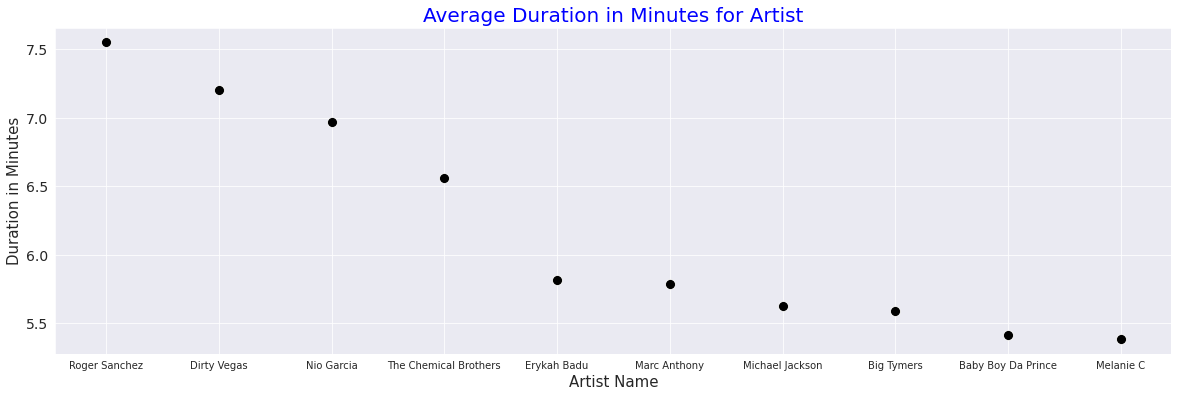

In [95]:
sns.set_style("darkgrid")
plt.figure(figsize=(20,6))
sns.scatterplot(x=avg_duration_per_artist_top10.artist, y=avg_duration_per_artist_top10.duration_in_min,s=100,color = 'Black')
plt.title('Average Duration in Minutes for Artist',size = 20,c = 'b')
plt.xlabel("Artist Name",size = 15)
plt.ylabel("Duration in Minutes",size = 15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=14);

Songs by Roger Sanchez have the highest average Duration

### Artist with Quietest songs

We will now find list of artist whose songs have least average loudness value. 
Loudness can be defined as - 

The quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

Note - Lower the loudness, quieter the song

In [419]:
spotify_df[['artist','loudness']]

,artist,loudness
0,Britney Spears,-5.444
1,blink-182,-4.918
2,Faith Hill,-9.007
3,Bon Jovi,-4.063
4,*NSYNC,-4.806
...,...,...
1995,Jonas Brothers,-5.065
1996,Taylor Swift,-5.707
1997,Blanco Brown,-8.635
1998,Sam Smith,-7.513


In [64]:
quitest_artist = spotify_df.groupby('artist')[['artist','loudness']].mean()

In [69]:
quitest_artist_df = quitest_artist.sort_values('loudness',ascending = False).tail(10)

In [70]:
quitest_artist_df

,loudness
artist,
So Solid Crew,-11.0720
Billie Eilish,-11.6766
Gesaffelstein,-12.2100
girl in red,-12.8080
Blueface,-12.8900
Floetry,-12.9320
Garrett Nash,-13.4000
Enya,-13.7440
Katie Melua,-14.4180


In [431]:
quitest_artist_df.reset_index(level=0, inplace=True)

In [432]:
quitest_artist_df

,artist,loudness
0,So Solid Crew,-11.0720
1,Billie Eilish,-11.6766
2,Gesaffelstein,-12.2100
3,girl in red,-12.8080
4,Blueface,-12.8900
5,Floetry,-12.9320
6,Garrett Nash,-13.4000
7,Enya,-13.7440
8,Katie Melua,-14.4180
9,Gary Jules,-17.2170


Text(0.5, 1.0, 'Top 10 Quietest Singer')

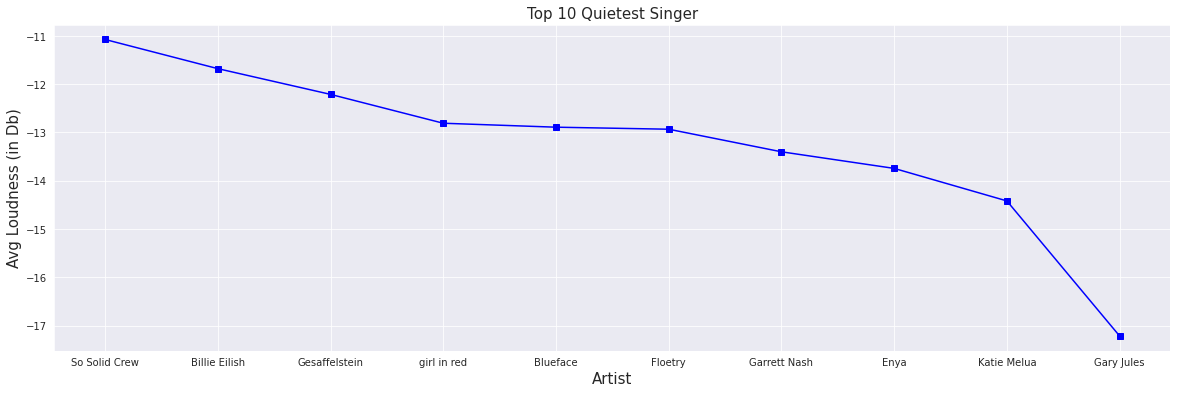

In [439]:
plt.figure(figsize=(20,6))
plt.plot(quitest_artist_df.artist,quitest_artist_df.loudness,'s-b')
plt.xlabel('Artist',size = 15)
plt.ylabel('Avg Loudness (in Db)',size = 15)

plt.title("Top 10 Quietest Singer",size = 15)


Gary Jules's songs have the  lowest average loudness

### Popularity of Explicit songs over the years

We will now see how popular explicit songs have gotten with time. 
Explicit song -

The lyrics or content of a song which could be considered offensive or unsuitable for children.

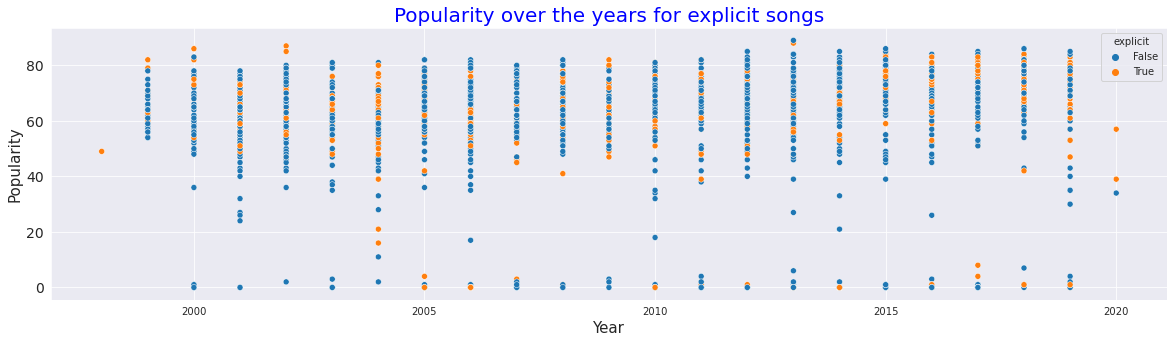

In [443]:
plt.figure(figsize=(20,5))
sns.scatterplot(x=spotify_df.year,y=spotify_df.popularity,hue = spotify_df.explicit)
plt.title('Popularity over the years for explicit songs',size = 20,c = 'b')
plt.xlabel("Year",size = 15)
plt.ylabel("Popularity",size = 15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=14);

Mosf of the Years, non-explicit songs have dominated the lists. There were many explicit songs in 2004 which is the only exception to the norm. Except a few year - 2000,2003,2004,2009 and 2016, the most popular songs were non-explicit

### Number of Songs each year

We will now see the number of songs to make it to the Spotify's popular list every year.

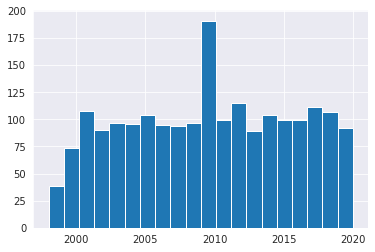

In [56]:
plt.hist(spotify_df.year,bins=20);

2009 had the most number of songs in the list

# Asking and Answering Questions


Now lets answer some questions that will arise when someone takes a look at the dataset

### Has the average duration of song gone up or down with time?


In [44]:
spotify_duration_df = spotify_df.groupby('year')[['year','duration_in_min']]

In [46]:
spotify_duration_df_mean = spotify_duration_df.mean()

In [47]:
spotify_duration_df_mean.head()

,year,duration_in_min
year,,
1998,1998.0,3.591100
1999,1999.0,4.223077
2000,2000.0,4.166551
2001,2001.0,4.040834
2002,2002.0,4.225818


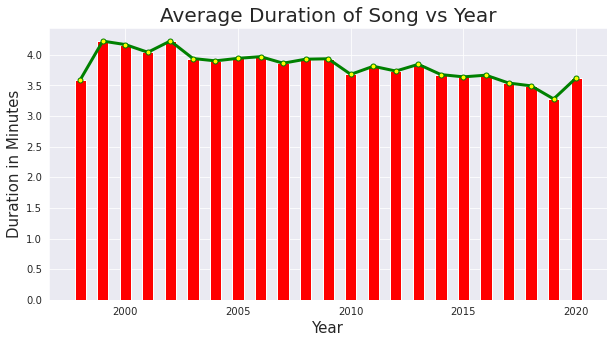

In [49]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
plt.bar(spotify_duration_df_mean.year,spotify_duration_df_mean.duration_in_min,color = 'red',width = 0.5)
plt.title("Average Duration of Song vs Year",size = 20)
plt.xlabel("Year",size = 15)
plt.ylabel("Duration in Minutes",size = 15)
plt.plot(spotify_duration_df_mean.year,spotify_duration_df_mean.duration_in_min,color='green',linewidth = 3,marker='o', markerfacecolor='yellow', markersize=5);


As can be seen in the above graph, the average duration of song has gone down.

### Who are the top 10 Artist to feature the Most number of times in the List?

In [229]:
spotify_df['song'].count()

2000

In [50]:
maxsongs_df = spotify_df.groupby('artist')[['song']].count()

In [51]:
maxsongs_df.head()

,song
artist,
*NSYNC,4
112,2
2 Chainz,2
21 Savage,2
2Pac,2


In [52]:
graph_maxsongs_df = maxsongs_df.sort_values('song',ascending =False).head(10)

In [53]:
graph_maxsongs_df

,song
artist,
Rihanna,25
Drake,23
Eminem,21
Calvin Harris,20
Britney Spears,19
David Guetta,18
Kanye West,17
Chris Brown,17
Taylor Swift,16


In [54]:
graph_maxsongs_df.reset_index(level=0, inplace=True)

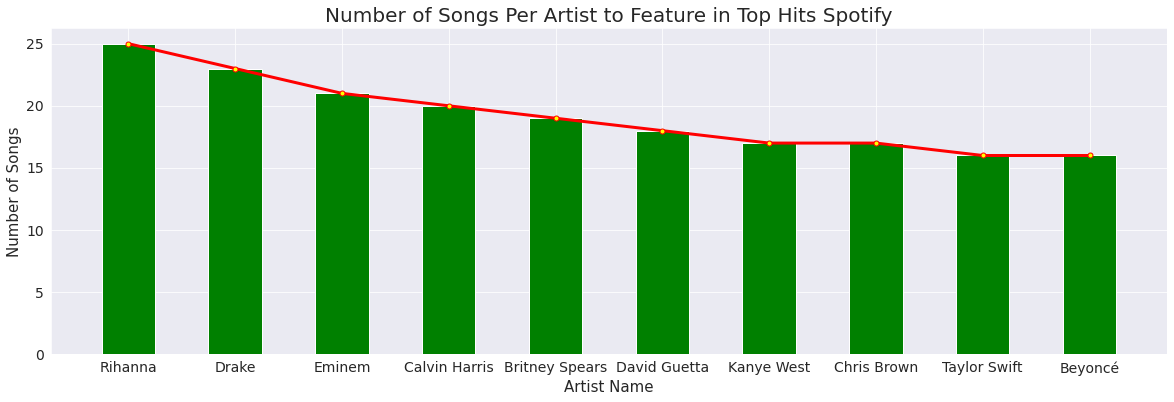

In [56]:
sns.set_style('darkgrid')
plt.figure(figsize=(20,6))
plt.bar(graph_maxsongs_df.artist,graph_maxsongs_df.song,color = 'green',width = 0.5)
plt.title("Number of Songs Per Artist to Feature in Top Hits Spotify",size = 20)
plt.xlabel("Artist Name",size = 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Number of Songs",size = 15)
plt.plot(graph_maxsongs_df.artist,graph_maxsongs_df.song,color='red',linewidth = 3,marker='o', markerfacecolor='yellow', markersize=5);


Rihanna is the artist to feature the most in the Spotify's list closely followed by Drake

### What is the trend for the Number of Songs and the average Popularity over time? 

In [87]:
avg_popularity_per_year = spotify_df.groupby('year')[['popularity','song']].mean()

In [88]:
songs_per_year_year = spotify_df.groupby('year')[['song']].count()

In [89]:
avg_popularity_per_year_df = avg_popularity_per_year.reset_index(level=0, inplace=True)

In [90]:
songs_per_year_ = songs_per_year.reset_index(level=0, inplace=True)

In [91]:
merged_df = songs_per_year.merge(avg_popularity_per_year, on="year")

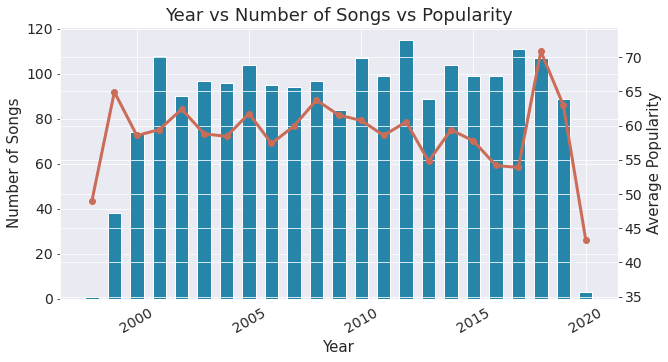

In [92]:

fig=plt.figure(figsize=(10,5))
ax1=plt.subplot(1,1,1)
ax1.bar(merged_df['year'],merged_df['song'],width=0.6,color='#2785A9')
ax1.set_ylim(0,merged_df['song'].max()*1.05)
for xlabel in ax1.get_xticklabels():
    xlabel.set_rotation(30)

#Add the second axes for line chart
ax2=ax1.twinx()
ax2.plot(merged_df['year'],merged_df['popularity'],'o-',color='#CA6C57',linewidth=3)
ax2.set_ylim(merged_df['popularity'].min()*0.8,merged_df['popularity'].max()*1.05)

plt.title('Year vs Number of Songs vs Popularity', fontsize=18)
ax1.set_xlabel('Year',size = 15)
ax1.set_ylabel('Number of Songs',size = 15)
ax2.set_ylabel('Average Popularity',size = 15);

The above visualisation is a dual axis bar graph. The left Y axis shows the number of songs and the right Y axis shows the average popularity. 
As can be seen, the popularity rating was on a decline till 2016 while the number of songs didnt change as much as the rating. The popularity has picked up for 2018 only to fall again. 

### Are Explicit Songs Longer in Duration and Wordier than non-explicit? 

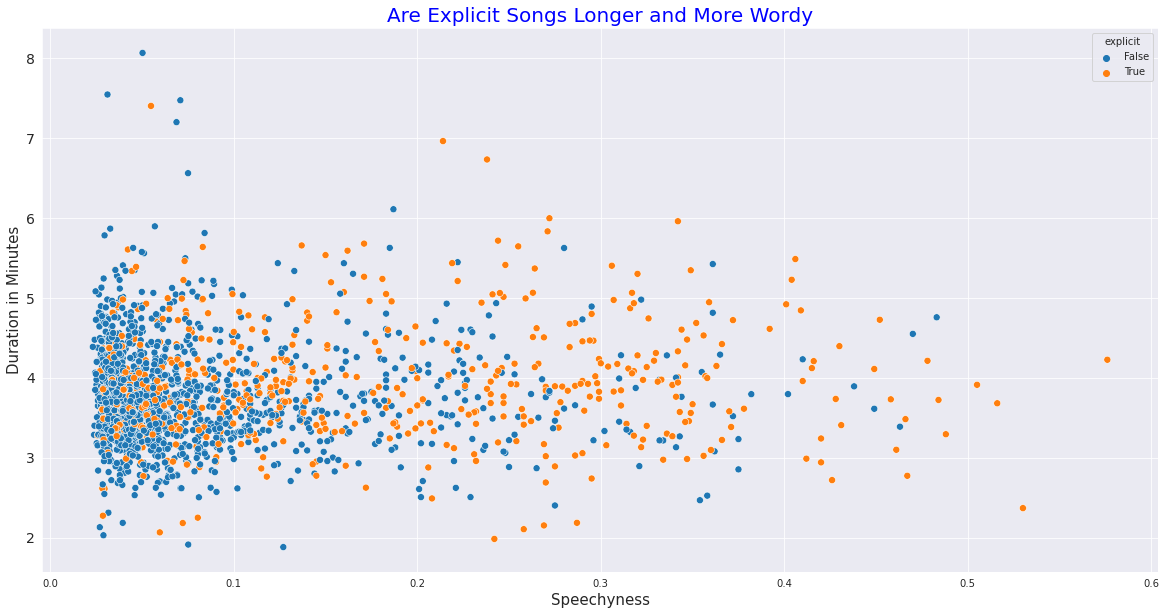

In [332]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=spotify_df.speechiness, y= spotify_df.duration_in_min,s=50,hue=spotify_df.explicit)
plt.title('Are Explicit Songs Longer and More Wordy',size = 20,c = 'b')
plt.xlabel("Speechyness",size = 15)
plt.ylabel("Duration in Minutes",size = 15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=14);


The above graph is a scatter graph showing relation between Speechyness and Duration of song for Explicit Songs. 
Songs form a large cluster for Speechyness > 0.1. Most of these songs are also Non-Explicit. As the Speechyness increases, so does the number of explicit songs. 

Note - Speechyness -Detects the presence of spoken words in a track.Higher the score, more speechy the song is. 

### Do more Popular songs have more tempo than the less popular ones?

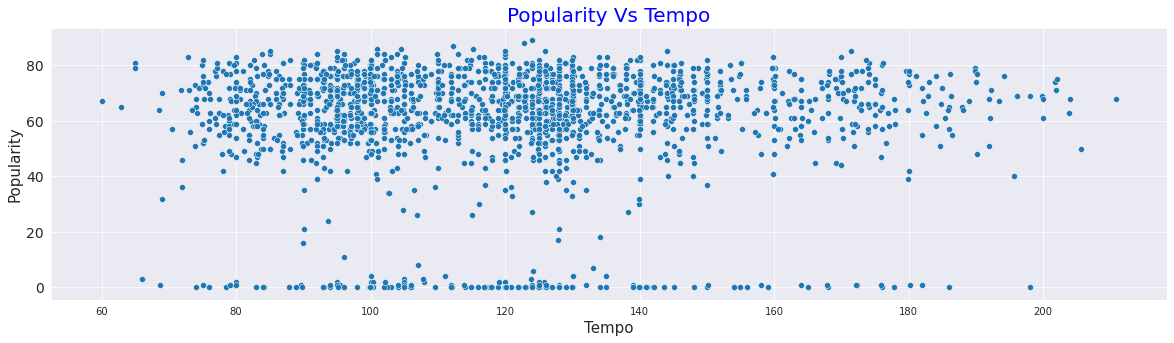

In [84]:
plt.figure(figsize=(20,5))
sns.scatterplot(x=spotify_df.tempo, y= spotify_df.popularity)
plt.title('Popularity Vs Tempo',size = 20,c = 'b')
plt.xlabel("Tempo",size = 15)
plt.ylabel("Popularity",size = 15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=14);


Majority of the Popular songs have Tempo over 90. 

# Inference and Conclusion

The number of songs to make it to this list was constant with time apart from the aberration 2009. It is clear that Rihanna is the crowd favourite. An interesting take from this dataset is the average duration of songs has gone down with time and so have the average popularity scores. Another finding being tempo ratings between 80-150 are the sweet spot for popularity rating. An artist or a producer planning to create a song can consider these. 

# References

https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019

In [ ]:
jovian.commit(project="tanveer-jovian-project-starter")

<IPython.core.display.Javascript object>